In [7]:
import time
import numpy as np
import matplotlib.pyplot as plt

iteration : 500
check : 5000.0 [ 250.  300.  350.  400.  450.  500.  550.  600.  650.  700.  750.  800.
  850.  900.  950. 1000. 1050. 1100. 1150.]
0.0
600_605 data shape : (1, 19, 25)


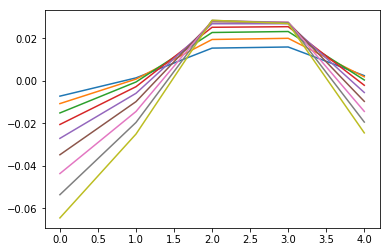

0.0
600_610 data shape : (1, 19, 25)


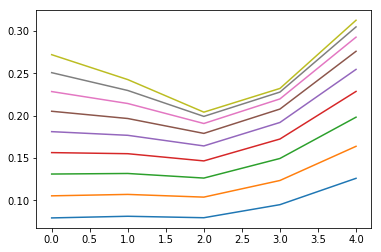

0.0
600_615 data shape : (1, 19, 25)


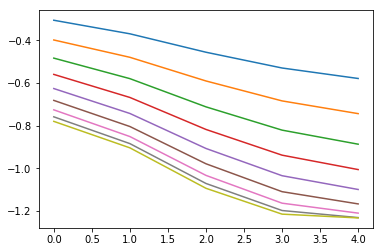

In [67]:
a = time.time()
data_num = 2

np.random.seed(37)

ch_num = 19
time_len = 0.5     ## ms 
dt = 1e-6         
itmax = int((time_len/1000)/dt)
print('iteration :', itmax)

w0 = np.linspace(200, 1200,ch_num+2)[1:-1]
w0 = 2*np.pi*w0
gm = 5000*2*np.pi  ## /s
mass = 1/w0
amp = 10000
print('check :', gm/(2*np.pi), w0/(2*np.pi))

count = 0
for freq1 in range(600, 700, 5):
    for freq2 in range(freq1+5, 700, 5):
        if freq1==freq2: print('same'); continue
        if count>2: break
        for try_num in range(1):
            count += 1
            amp1 = np.random.random()*0.2 + 0.8
            amp2 = np.random.random()*0.2 + 0.8
            sound1 = amp1*np.sin(2*np.pi*(freq1*np.linspace(0,time_len/1000,itmax)+np.random.random()))
            sound2 = amp2*np.sin(2*np.pi*(freq2*np.linspace(0,time_len/1000,itmax)+np.random.random()))
            sound = sound1 + sound2
            
            u = np.zeros(ch_num)
            v = np.zeros(ch_num)
            dudt = np.zeros(ch_num)
            dvdt = np.zeros(ch_num)

            for it in range(0,itmax):             
                t = it*dt
                dudt = v
                dvdt = -gm*v -(w0**2)*u + amp*sound[it]/mass

                u = u + dudt*dt
                v = v + dvdt*dt
                        
            for it in range(0,itmax):             
                t = it*dt
                dudt = v
                dvdt = -gm*v -(w0**2)*u + amp*sound[it]/mass

                u = u + dudt*dt
                v = v + dvdt*dt

                if it%20==0:  ### 50k sampling rate
                    if it==0:
                        pos_list = u.reshape(1,-1)
                    else:
                        pos_list = np.concatenate((pos_list, u.reshape(1,-1)))
                        
            pos_list = np.transpose(pos_list)
            if try_num==0:
                whole_pos = pos_list.reshape(1,np.shape(pos_list)[0], np.shape(pos_list)[1])
                whole_raw = sound[::20].reshape(1,-1)
            else:
                whole_pos = np.concatenate((whole_pos, pos_list.reshape(1,np.shape(pos_list)[0], 
                                                                        np.shape(pos_list)[1])))
                whole_raw = np.concatenate((whole_raw, sound[::20].reshape(1,-1)))

            if try_num%50==0: print(try_num/500)

#         np.save('data/sim_data%d/mic/%d_%d.npy'%(data_num, freq1, freq2), whole_pos)
#         np.save('data/sim_data%d/raw/%d_%d.npy'%(data_num, freq1, freq2), whole_raw)
        print('%d_%d data shape :'%(freq1, freq2), np.shape(whole_pos))
        for k in range(1,19,2):
            plt.plot(whole_pos[0][k][::5])
        plt.show()
        if count>2: break
